In [11]:
import numpy as np
from numpy import log as ln, exp
from scipy import stats
from matplotlib import pyplot as plot
import matplotlib
import os
from matplotlib.patches import Rectangle

matplotlib.rcParams["figure.dpi"] = 300
os.environ["PATH"] += os.pathsep + """/usr/local/texlive/2023/bin/
                                      universal-darwin"""

R^2 0.88
slope_1 -0.44 slope_2 -0.42
N_frac_1 2.44 N_frac_2 2.42
N_lin_1 1.88 N_lin_2 1.85
R^2_1 1.0 R^2_2 0.99
A$\beta$40 slope -0.26 N_frac 2.26 N_lin 1.51

R^2 1.0
A$\beta$40 slope -0.13 N_frac 2.13 N_lin 1.26

R^2 0.95
insulin slope -0.7 N_frac 2.7 N_lin 2.39

R^2 0.85
slope_1 -0.26 slope_2 -1.4
N_frac_1 2.26 N_frac_2 3.4
N_lin_1 1.53 N_lin_2 3.8
R^2_1 1.0 R^2_2 1.0
$\alpha$-syn slope -0.75 N_frac 2.75 N_lin 2.51

R^2 0.78
slope_1 -0.96 slope_2 -0.16
N_frac_1 2.96 N_frac_2 2.16
N_lin_1 2.92 N_lin_2 1.32
R^2_1 0.99 R^2_2 0.82
glucagon slope -0.34 N_frac 2.34 N_lin 1.69

R^2 1.0
PrP slope -1.63 N_frac 3.63 N_lin 4.26

R^2 0.98
Sup35 slope -0.39 N_frac 2.39 N_lin 1.79



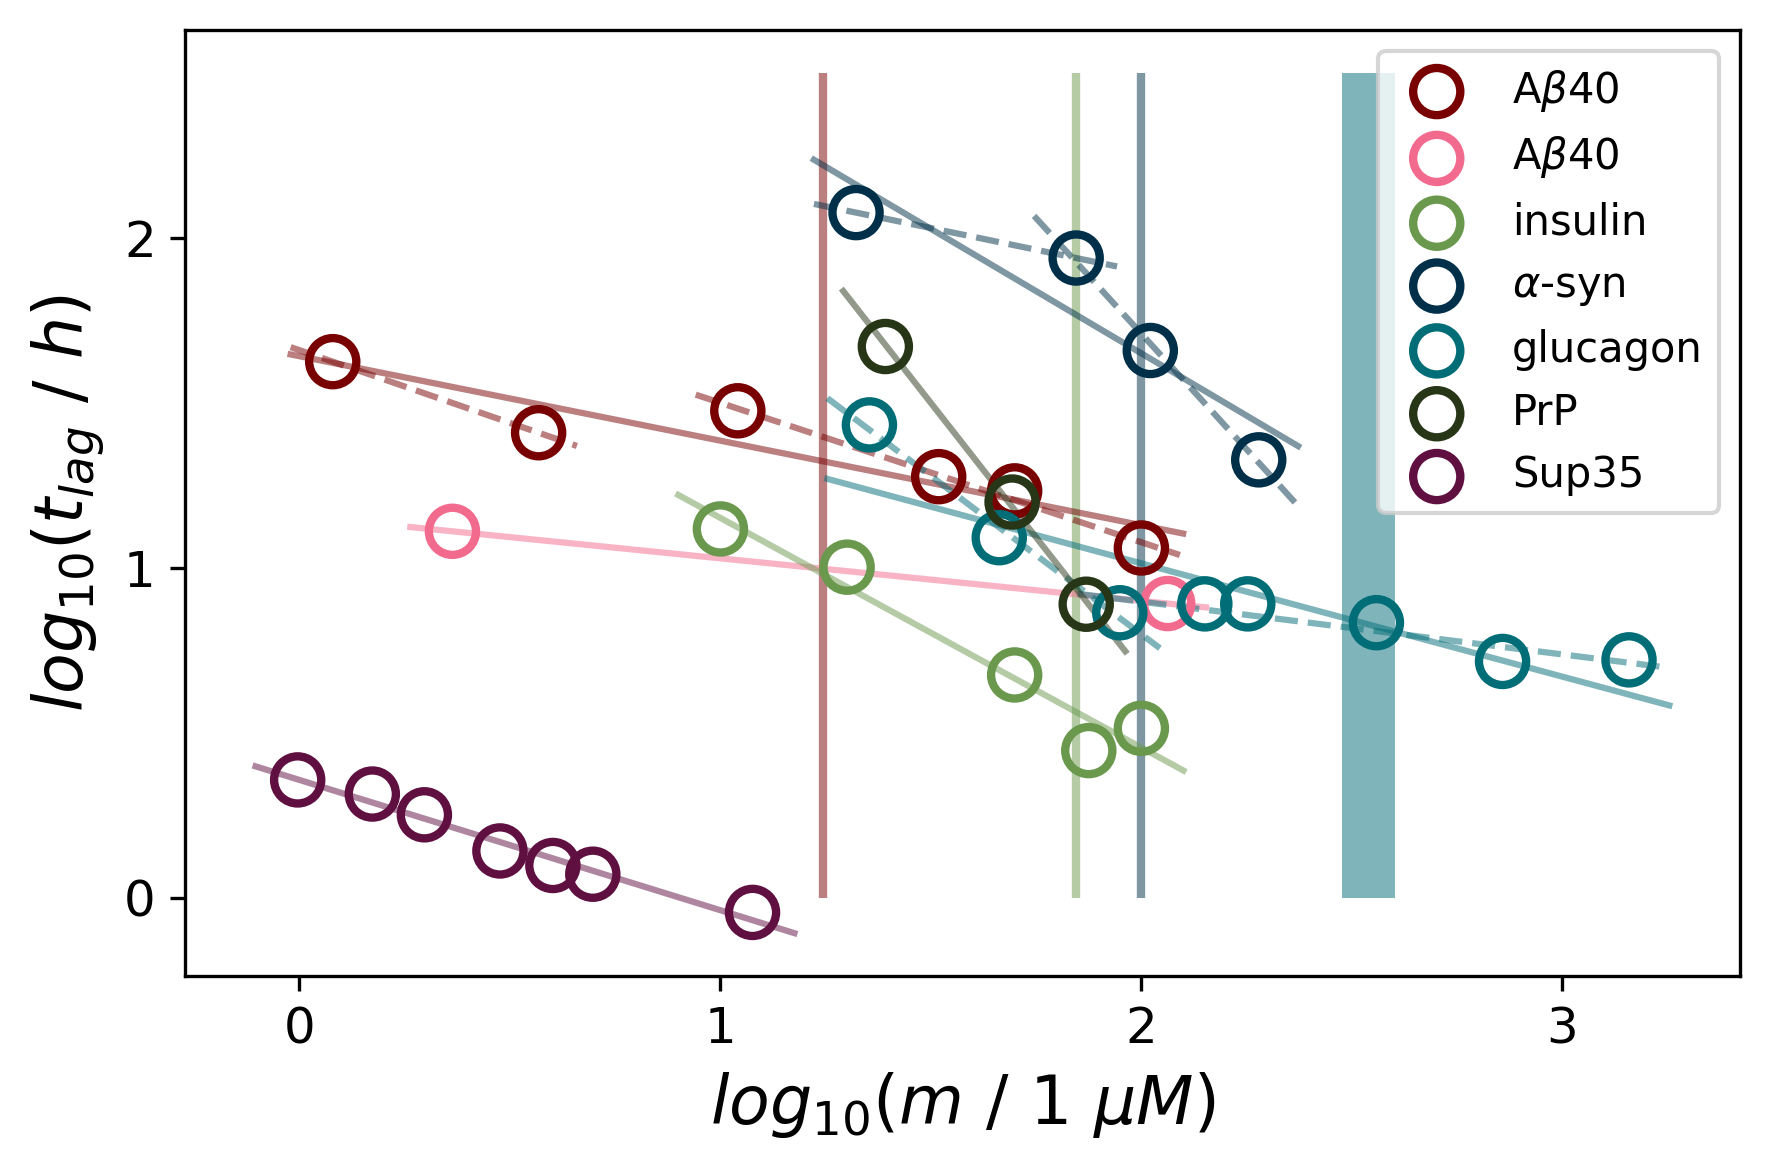

In [12]:
fig, ax = plot.subplots()


def get_N_crit(slope):
    return -slope + 2
    

def get_N_crit_lin(slope):
    return -2 * slope + 1


def build_peptide(m_list, t_lag_list, label, color, split=None):
    ln_m_arr = np.log(np.array(m_list)) / np.log(10)
    ln_t_lag_arr = np.log(np.array(t_lag_list)) / np.log(10)

    regr = stats.linregress(ln_m_arr, ln_t_lag_arr)
    print("R^2", round(regr.rvalue**2, 2))
    slope, intercept = regr.slope, regr.intercept

    if split is not None:
        m_1_sub, m_2_sub, m_1_sup, m_2_sup = \
            split[0][0]-1, split[0][1], split[1][0]-1, split[1][1]
        regr_sub = stats.linregress(ln_m_arr[m_1_sub:m_2_sub],
                                    ln_t_lag_arr[m_1_sub:m_2_sub])
        slope_sub = regr_sub.slope
        regr_sup = stats.linregress(ln_m_arr[m_1_sup:m_2_sup],
                                    ln_t_lag_arr[m_1_sup:m_2_sup])
        slope_sup = regr_sup.slope

        print("slope_1", round(slope_sub, 2), "slope_2", round(slope_sup, 2))
        print("N_frac_1", round(get_N_crit(slope_sub), 2),
              "N_frac_2", round(get_N_crit(slope_sup), 2))
        print("N_lin_1", round(get_N_crit_lin(slope_sub), 2),
              "N_lin_2", round(get_N_crit_lin(slope_sup), 2))
        print("R^2_1", round(regr_sub.rvalue**2, 2), "R^2_2", round(regr_sup.rvalue**2, 2))

        ln_m_regr_list, ln_t_lag_regr_list = [], []

        for ln_m in np.arange(np.min(ln_m_arr[m_1_sub:m_2_sub])-0.1,
                              np.max(ln_m_arr[m_1_sub:m_2_sub])+0.1,
                              0.01):
            ln_m_regr_list.append(ln_m)
            ln_t_lag_regr_list.append(regr_sub.intercept + slope_sub * ln_m)

        plot.plot(ln_m_regr_list, ln_t_lag_regr_list,
                  color=color, alpha=0.5, zorder=-1, linestyle="--")

        ln_m_regr_list, ln_t_lag_regr_list = [], []

        for ln_m in np.arange(np.min(ln_m_arr[m_1_sup:m_2_sup])-0.1,
                              np.max(ln_m_arr[m_1_sup:m_2_sup])+0.1,
                              0.01):
            ln_m_regr_list.append(ln_m)
            ln_t_lag_regr_list.append(regr_sup.intercept + slope_sup * ln_m)

        plot.plot(ln_m_regr_list, ln_t_lag_regr_list, color=color,
                  alpha=0.5, zorder=-1, linestyle="--")

    ln_m_regr_list, ln_t_lag_regr_list = [], []

    for ln_m in np.arange(np.min(ln_m_arr)-0.1, np.max(ln_m_arr)+0.1, 0.01):
        ln_m_regr_list.append(ln_m)
        ln_t_lag_regr_list.append(intercept + slope * ln_m)

    plot.plot(ln_m_regr_list, ln_t_lag_regr_list,
              color=color, alpha=0.5, zorder=-1)

    plot.scatter(ln_m_arr, ln_t_lag_arr, s=128, color="none",
                 linewidth=2, edgecolor=color, zorder=0, label=label)

    N_crit = get_N_crit(slope)
    N_crit_lin = get_N_crit_lin(slope)
    
    print(label, "slope", round(slope,2), "N_frac", round(N_crit, 2),
                 "N_lin", round(N_crit_lin, 2))
    print()


# 2014 Alzheimer prot mut / benilova2014alzheimer
amyl_beta_m_list = [100, 50, 33, 11, 3.7, 1.2]
amyl_beta_m_list.reverse()
amyl_beta_t_list = [11.49606, 17.12454, 18.90861, 29.94412, 25.69273, 42.18861]
amyl_beta_t_list.reverse()
build_peptide(amyl_beta_m_list, amyl_beta_t_list,
              r"A$\beta$40", "#780000",
              split=((1, 2), (3, 6)))

plot.vlines(x=np.log(17.5) / np.log(10), ymin=0, ymax=2.5,
            zorder=-2, linewidth=2, color="#780000", alpha=0.5)

# 2005 stock nucl / hortschansky2005aggregation
build_peptide(np.array([0.01, 0.5]) * 10**6 / 4330,
              [12.914842332448384, 7.80115902398663],
              r"A$\beta$40", "#f26a8d")

# 2017 insulin low mol weight / mawhinney2017elucidation
build_peptide([10, 20, 50, 75, 100], [13.12983, 10.05408, 4.73856, 2.79601, 3.26629],
              "insulin", "#6a994e")

plot.vlines(x=np.log(70) / np.log(10), ymin=0, ymax=2.5,
            zorder=-2, linewidth=2, color="#6a994e", alpha=0.5)

# 2001 aggr / uversky2001metal
alpha_syn_m_list = [190, 105, 70, 21]
alpha_syn_m_list.reverse()
alpha_syn_t_list = [21.26436, 45.60487, 86.95666, 119.38926]
alpha_syn_t_list.reverse()
build_peptide(alpha_syn_m_list, alpha_syn_t_list,
              r"$\alpha$-syn", "#003049",
              ((1, 2), (2, 4)))

plot.vlines(x=np.log(100) / np.log(10), ymin=0, ymax=2.5,
            zorder=-2, linewidth=2, color="#003049", alpha=0.5)

# 2010 amyl glucagon fibr / pedersen2010nature
m_glucagon_list = [0.07885698277362686, 0.16038834323050954, 0.3101510016911516, 0.4937606601091607, 0.6244037279870213, 1.2621129501461767, 5.02475666835675, 2.516166466611133]
build_peptide(np.array(m_glucagon_list) * 10**6 / 3490,
              [27.140770209207215, 12.352425242410687, 7.315527254738861, 7.784049571140164, 7.784049571140164, 6.825437596331329, 5.266058793357991,  5.207599061432788],
              "glucagon", "#006d77",
              split=((1,3),(3,8)))

# 2011 dynamic mult struc / alvarez2011dynamics
build_peptide(np.array([0.4, 0.8, 1.2]) / 16227 * 10**6,
              [46.894409937888206, 15.838509316770185, 7.763975155279496],
              "PrP", "#283618")

# 2004 Sup35 / collins2004mechanism
build_peptide([0.9905497407751119, 1.4900329635645067, 1.9811037337930752, 2.994254147511826, 4.0000171712625425, 4.976307588327792, 11.92034046584007],
              np.array([136.7119931021745, 123.88085108976797, 107.16659295874662, 83.2790087872571, 75.2444059529987, 70.80067856843452, 54.227435693730705]) / 60,
              "Sup35", "#5f0f40")

ax.add_patch(Rectangle((np.log(300) / np.log(10), 0),
                       (np.log(400) - np.log(300)) / np.log(10), 2.5,
                        fc = "#006d77", 
                        lw = 0, alpha=0.5, zorder=-1) )

plot.xlabel(r"$log_{10}(m\ /\ 1\ \mu M)$", fontsize=16)
plot.ylabel(r"$log_{10}(t_{lag}\ /\ h)$", fontsize=16)
plot.xticks(fontsize=12)
plot.yticks(fontsize=12)
plot.locator_params(axis="x", nbins=4)
plot.locator_params(axis="y", nbins=5)
plot.legend()
plot.tight_layout()
plot.savefig("fig/m_t_lag.png")

In [10]:
names = ["1aml", "3i40", "1xq8", "1gcn", "6du9", "Sup35", "fold_prion"]

for name in names:
    f = open("struc/" + name + ".dssp")
    lines = f.readlines()
    f.close()

    flag = False
    cnt, cnt_H = 0, 0

    for line in lines:
        tokens = line.split()

        if flag:
            if tokens[1] not in ["!", "!*"]:
                cnt += 1
            if tokens[4] == "H":
                cnt_H += 1

        if tokens[0] == "#":
            flag = True

    print(name, cnt, cnt_H, round(cnt_H / cnt * 100))

1aml 40 15 38
3i40 51 17 33
1xq8 140 83 59
1gcn 29 14 48
6du9 91 49 54
Sup35 254 26 10
fold_prion 141 61 43
